In [52]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import numpy as np
import datetime as dt

import os
import requests
import yfinance as yf
from pathlib import Path
from dotenv import load_dotenv



In [53]:
# Load .env enviroment variables
load_dotenv()

True

In [54]:
#creating variables for the tickers to use yfinance API functions
btc = yf.Ticker("BTC-USD")
eth = yf.Ticker("ETH-USD")
xrp = yf.Ticker("XRP-USD")
ada = yf.Ticker("ADA-USD")
doge = yf.Ticker("DOGE-USD")
ixic = yf.Ticker("^IXIC")
gspc = yf.Ticker("^GSPC")
axjo = yf.Ticker("^AXJO")

#importing data with yfinance API
crypto_df = yf.download("BTC-USD ETH-USD XRP-USD ADA-USD DOGE-USD LINK-USD USDT-USD BNB-USD" , start="2017-01-01", end= "2022-01-01")
index_df = yf.download("^IXIC ^GSPC ^AXJO", start="2017-01-01", end= "2022-01-01")


[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  3 of 3 completed


In [55]:
#calculate % change on close prices
crypto_daily_change = crypto_df["Close"].pct_change().dropna()
index_daily_change = index_df["Close"].pct_change().dropna()


In [69]:

crypto_daily_change.head()

,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,LINK-USD,USDT-USD,XRP-USD
Date,,,,,,,,
2017-11-10,-0.153933,-0.097415,-0.073554,-0.178092,-0.067411,-0.162375,-0.002152,-0.050600
2017-11-11,0.011726,-0.070329,-0.039368,0.032674,0.051555,-0.041748,0.002962,0.019115
2017-11-12,-0.126107,-0.090262,-0.064101,-0.135720,-0.021523,-0.049352,0.003449,-0.062211
2017-11-13,0.076365,0.109845,0.102422,0.166667,0.028606,0.071230,-0.003082,0.030927
2017-11-14,0.016352,-0.055757,0.011626,-0.022296,0.066037,0.027547,-0.002497,0.031375


In [70]:
index_daily_change.head()

,^AXJO,^GSPC,^IXIC
Date,,,
2017-01-04,0.000558,0.005722,0.008827
2017-01-05,0.002946,-0.000771,0.001997
2017-01-06,0.000400,0.003517,0.006035
2017-01-09,0.009000,-0.003549,0.001949
2017-01-10,-0.008041,0.000000,0.003615


In [56]:
#concat dataframes
combined_df = pd.concat([crypto_daily_change, index_daily_change], axis="columns", join="inner")

combined_df



,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,LINK-USD,USDT-USD,XRP-USD,^AXJO,^GSPC,^IXIC
Date,,,,,,,,,,,
2017-11-10,-0.153933,-0.097415,-0.073554,-0.178092,-0.067411,-0.162375,-0.002152,-0.050600,-0.003306,-0.000898,0.000132
2017-11-13,0.076365,0.109845,0.102422,0.166667,0.028606,0.071230,-0.003082,0.030927,-0.001261,0.000984,0.000987
2017-11-14,0.016352,-0.055757,0.011626,-0.022296,0.066037,0.027547,-0.002497,0.031375,-0.009266,-0.002310,-0.002920
2017-11-15,0.008197,-0.039012,0.102444,0.130912,-0.012659,-0.010504,-0.003625,0.014922,-0.005330,-0.005526,-0.004699
2017-11-16,0.042919,0.031017,0.076023,0.038088,-0.007298,-0.087983,-0.001057,0.066450,0.001567,0.008196,0.012985
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.039056,0.028604,-0.003328,-0.012183,-0.007322,-0.001203,-0.000505,0.005432,0.000000,0.013839,0.013920
2021-12-28,-0.073136,-0.049256,-0.060259,-0.072390,-0.058613,-0.112722,0.001224,-0.079060,0.000000,-0.001010,-0.005642
2021-12-29,-0.050953,-0.039122,-0.024042,-0.036481,-0.045348,-0.033769,-0.000873,-0.042494,0.012062,0.001402,-0.000982


<AxesSubplot:xlabel='Date'>

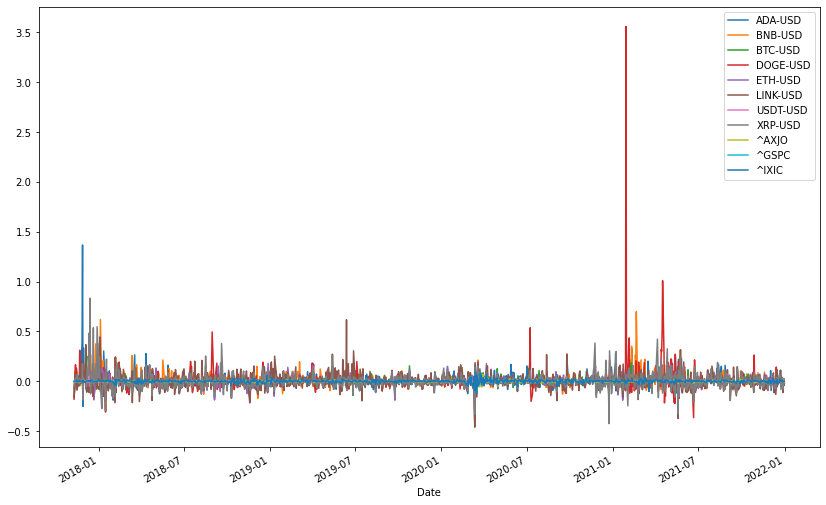

In [57]:
#plot daily returns
combined_df.plot(figsize=(14, 9))

In [58]:
#standard deviation 
combined_df.std()


ADA-USD     0.083679
BNB-USD     0.068861
BTC-USD     0.044561
DOGE-USD    0.134461
ETH-USD     0.055054
LINK-USD    0.078190
USDT-USD    0.005329
XRP-USD     0.077027
^AXJO       0.010872
^GSPC       0.013010
^IXIC       0.014597
dtype: float64

In [59]:
#plot cumulative returns

cum_returns = (1 + combined_df).cumprod() - 1

cum_returns.hvplot(width=1000, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [60]:
#calculating annualized standard deviation
annualized_crypto_std = crypto_daily_change.std() * np.sqrt(365)
annualized_index_st = index_daily_change.std() * np.sqrt(256)

In [61]:
print(annualized_crypto_std)
print(annualized_index_st)

ADA-USD     1.522545
BNB-USD     1.238091
BTC-USD     0.789205
DOGE-USD    2.310707
ETH-USD     0.990062
LINK-USD    1.446410
USDT-USD    0.095496
XRP-USD     1.358713
dtype: float64
^AXJO    0.163288
^GSPC    0.191554
^IXIC    0.216393
dtype: float64


<AxesSubplot:title={'center':'Rolling Standard Deviation (21 days) for both porfolios'}, xlabel='Date'>

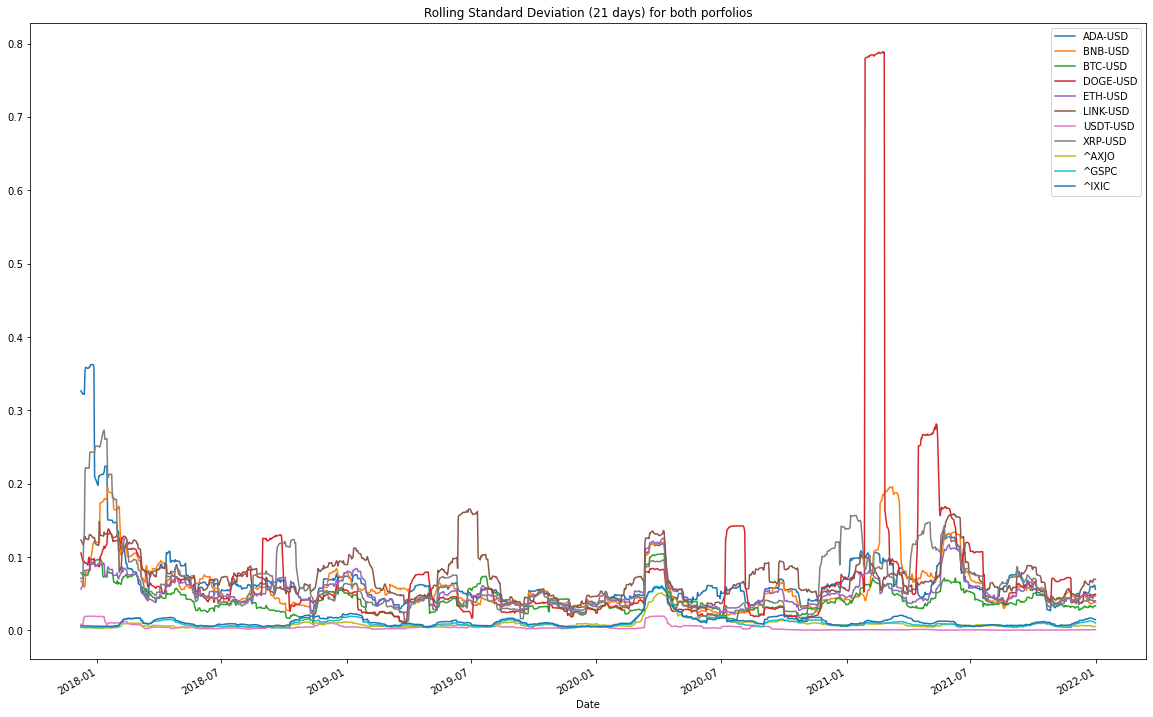

In [62]:
#calculating rolling standard deviation of the combined porfolio
combined_df.rolling(window =21).std().plot(title = "Rolling Standard Deviation (21 days) for both porfolios", figsize=(20, 13))


In [64]:
#correlation
correlation = combined_df.corr()
correlation.style.background_gradient(cmap="winter")

,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,LINK-USD,USDT-USD,XRP-USD,^AXJO,^GSPC,^IXIC
ADA-USD,1.000000,0.449237,0.523280,0.271851,0.595987,0.468952,-0.048271,0.621522,0.070873,0.183737,0.184988
BNB-USD,0.449237,1.000000,0.634258,0.222720,0.624040,0.497648,-0.050634,0.446811,0.075115,0.196402,0.208762
BTC-USD,0.523280,0.634258,1.000000,0.331751,0.774027,0.548481,0.022357,0.501500,0.108988,0.224036,0.243006
DOGE-USD,0.271851,0.222720,0.331751,1.000000,0.311440,0.262227,0.006958,0.271644,-0.009802,0.097010,0.090287
ETH-USD,0.595987,0.624040,0.774027,0.311440,1.000000,0.636582,-0.001641,0.618474,0.115929,0.244584,0.259997
LINK-USD,0.468952,0.497648,0.548481,0.262227,0.636582,1.000000,-0.018099,0.474317,0.069842,0.203499,0.215471
USDT-USD,-0.048271,-0.050634,0.022357,0.006958,-0.001641,-0.018099,1.000000,-0.035562,-0.120568,-0.118856,-0.100836
XRP-USD,0.621522,0.446811,0.501500,0.271644,0.618474,0.474317,-0.035562,1.000000,0.046225,0.153037,0.160980
^AXJO,0.070873,0.075115,0.108988,-0.009802,0.115929,0.069842,-0.120568,0.046225,1.000000,0.425834,0.355230
^GSPC,0.183737,0.196402,0.224036,0.097010,0.244584,0.203499,-0.118856,0.153037,0.425834,1.000000,0.945492


In [66]:
#sharpe ratios
sharpe_ratio_stocks = (index_daily_change.mean() *252) / (index_daily_change.std() * np.sqrt(252))
sharpe_ratio_crypto = (crypto_daily_change.mean() *365) / (crypto_daily_change.std() * np.sqrt(365))



In [67]:
stock_pl = px.bar(sharpe_ratio_stocks, title="Stock Market Sharpe Ratios")
crypto_pl =px.bar(sharpe_ratio_crypto, title="Crypto Market Sharpe Ratios" )

In [68]:

tabs = pn.Tabs(
    ("Stock", stock_pl),
    ("Crypto", crypto_pl)
    
    
    
)
tabs

Tabs
    [0] Plotly(Figure, name='Stock')
    [1] Plotly(Figure, name='Crypto')